In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [165]:
crimerateDataPath = "../result_gowalla/result_top_20.txt"
ds = "gowalla"
alg = "STACP"
df = pd.read_csv(crimerateDataPath, sep = "\t", header = None)
df.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]

In [172]:

df.drop(df.tail(1).index,inplace=True)
df

,cnt,uid,prec,rec,ndcg,map
0,0,5407,0.00,0.000000,0.000000,0.000000
1,1,2020,0.05,0.111111,0.092349,0.111111
2,2,3998,0.00,0.000000,0.000000,0.000000
3,3,4188,0.00,0.000000,0.000000,0.000000
4,4,3499,0.00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
854,854,1423,0.00,0.000000,0.000000,0.000000
855,855,4351,0.05,0.166667,0.084060,0.055556
856,856,4093,0.00,0.000000,0.000000,0.000000
857,857,3136,0.00,0.000000,0.000000,0.000000


In [167]:
map_100 = df.loc[df["prec"]>=1]
map_80 = df.loc[df["prec"]>=0.8]
map_60 = df.loc[df["prec"]>=0.6]
map_40 = df.loc[df["prec"]>=0.4]
map_20 = df.loc[df["prec"]>=0.2]


In [168]:
map_100

,cnt,uid,prec,rec,ndcg,map


In [169]:
map_80

,cnt,uid,prec,rec,ndcg,map


In [170]:
map_60

,cnt,uid,prec,rec,ndcg,map


In [171]:
map_20

,cnt,uid,prec,rec,ndcg,map
70,70,282,0.30,0.171429,0.264718,0.097520
284,284,2554,0.20,0.235294,0.240272,0.067197
298,298,242,0.35,0.145833,0.320175,0.139831
323,323,2766,0.20,0.057971,0.341590,0.161111
397,397,488,0.25,0.083333,0.280271,0.076491
400,400,4664,0.20,0.400000,0.237274,0.220769
422,422,3904,0.25,0.156250,0.235535,0.073460
425,425,677,0.25,0.263158,0.343261,0.127820
472,472,961,0.35,0.466667,0.445329,0.310399
478,478,5466,0.35,0.250000,0.409204,0.192119


In [149]:
ex2 = pd.DataFrame(columns = ["dataset","algorithm", "visited","nDCG"]) 
ex2 = ex2.append({'dataset':ds,'algorithm': alg, 'visited':20, 'nDCG':map_20["ndcg"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,"algorithm": alg, 'visited':60, 'nDCG':map_60["ndcg"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,"algorithm": alg, 'visited':80, 'nDCG':map_80["ndcg"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,"algorithm": alg, 'visited':100, 'nDCG':map_100["ndcg"].mean()}, ignore_index=True)

In [151]:
ex2

,dataset,algorithm,visited,nDCG
0,gowalla,STACP,20,0.261724
1,gowalla,STACP,60,NaN
2,gowalla,STACP,80,NaN
3,gowalla,STACP,100,NaN


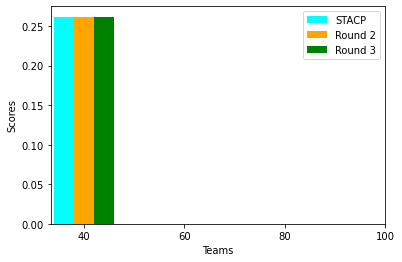

In [152]:
# create data 
x = np.arange(4) 
y1 = ex2.nDCG
y2 = ex2.nDCG
y3 = ex2.nDCG
width = 0.2
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, y1, width, color='cyan') 
plt.bar(x, y2, width, color='orange') 
plt.bar(x+0.2, y3, width, color='green') 
plt.xticks(x, ['40', '60', '80', '100']) 
plt.legend(["STACP", "Round 2", "Round 3"]) 
plt.xlabel("Teams") 
plt.ylabel("Scores") 
plt.show() 

In [157]:
df["ndcg"].mean()

0.040920421588774174

In [251]:
train_file = "Gowalla_train.txt"
train_data = pd.read_csv(train_file, sep = "\t", header = None)
train_data.columns = ["uid", "lid", "freq"]
perc = 0.8
new_train = pd.DataFrame()        


In [252]:

for i in train_data.uid.unique():
    new_train = new_train.append(train_data.loc[train_data["uid"]==i].iloc[:int(np.round(len(train_data.loc[train_data["uid"]==i])*perc))])

In [249]:
new_train

,uid,lid,freq
0,0,1,28
1,0,2,2
2,0,6,14
3,0,7,2
4,0,32,7
...,...,...,...
262703,5627,5068,1
262704,5627,2706,1
262705,5627,11022,1
262706,5627,14557,1


In [253]:
new_train.to_csv("train_80.txt", sep = "\t", header = False, index = False)